<pre>
Passenger ID : 승객의 고유 ID
Survived : 생존여부....사망=0 , 생존=1
Pclass : 승객등급
SibSp : 함께 탑승한 형제,자매 또는 배우자
Parch : 함께 탑승한 부모, 아이의 수
Cabin : 객실 번호
Embarked : 탑승 항구 (C: 캠브릿지, Q:퀸즈타운, S:사우스햄프턴)

In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [367]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [368]:
train = pd.read_csv("C:/Users/SMT047/Desktop/수업/data/14.Titanic/train.csv", index_col="PassengerId")

In [369]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [370]:
test = pd.read_csv("C:/Users/SMT047/Desktop/수업/data/14.Titanic/test.csv", index_col="PassengerId")

In [371]:
train.shape, test.shape

((891, 11), (418, 11))

In [372]:
test.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [373]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [374]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Name      418 non-null    object 
 3   Sex       418 non-null    object 
 4   Age       332 non-null    float64
 5   SibSp     418 non-null    int64  
 6   Parch     418 non-null    int64  
 7   Ticket    418 non-null    object 
 8   Fare      417 non-null    float64
 9   Cabin     91 non-null     object 
 10  Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [375]:
print( train["Survived"].count())
print( train["Age"].count())
print( train["Sex"].count())
print( train["Name"].count())

891
714
891
891


In [376]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [377]:
train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [378]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [379]:
test.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

생존자 리스트 확인

In [380]:
t_survived = train[train['Survived']==1]
t_survived.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


성별을 기준으로 생존자 숫자를 비교해 봅시다.

In [381]:
survived = t_survived.loc[:,'Sex'].value_counts() #생존자기준으로 성별 분류.
survived

female    233
male      109
Name: Sex, dtype: int64

사망자 base, 성별 분류

In [382]:
t_dead = train[train['Survived']==0]

In [383]:
dead=t_dead.loc[:,'Sex'].value_counts()

In [384]:
dead

male      468
female     81
Name: Sex, dtype: int64

In [385]:
df = pd.DataFrame([survived,dead], index=['Survived','Dead'])

In [386]:
df

,female,male
Survived,233,109
Dead,81,468


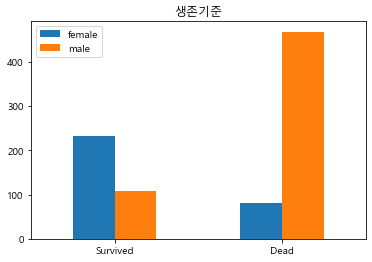

In [387]:
df.plot(kind='bar')
plt.title('생존기준')
plt.xticks(rotation=0)
plt.show()

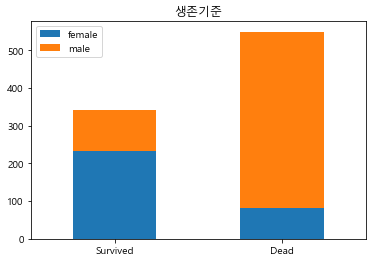

In [388]:
df.plot(kind='bar',stacked =True)
plt.title('생존기준')
plt.xticks(rotation=0)
plt.show()

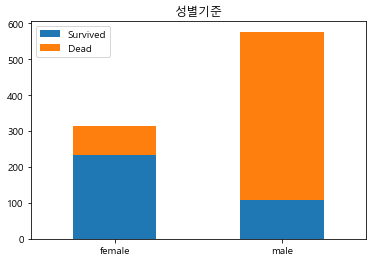

In [389]:
T_df = df.T
T_df.plot(kind='bar',stacked=True)
plt.title('성별기준')
plt.xticks(rotation=0)
plt.show()

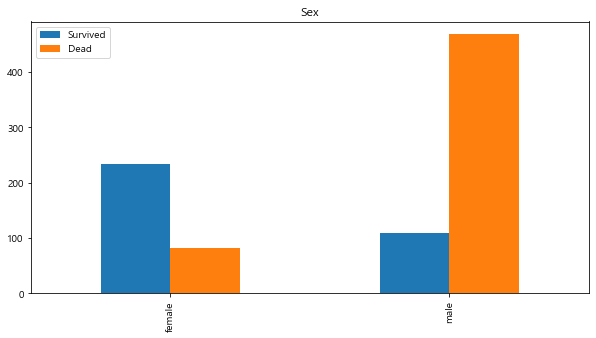

In [390]:
survived_1 = train[train['Survived']==1].loc[:,'Sex'].value_counts()
survived_0 = train[train['Survived']==0].loc[:,'Sex'].value_counts()
df=pd.DataFrame([survived_1,survived_0], index=['Survived','Dead'])
df=df.T
df.plot(kind='bar',figsize=(10,5))
plt.title('Sex')
plt.show()

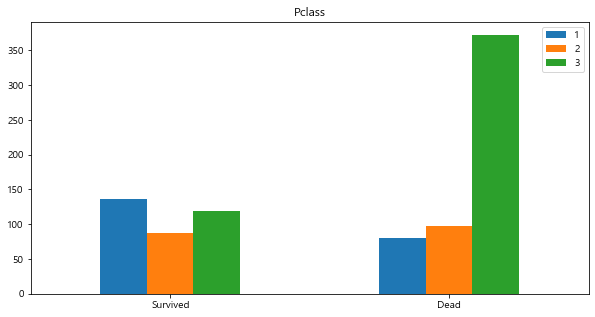

In [391]:
survived_1 = train[train['Survived']==1].loc[:,'Pclass'].value_counts()
survived_0 = train[train['Survived']==0].loc[:,'Pclass'].value_counts()
df=pd.DataFrame([survived_1,survived_0], index=['Survived','Dead'])
df.plot(kind='bar',figsize=(10,5))
plt.title('Pclass')
plt.xticks(rotation=0)
plt.show()

In [392]:
df

,1,2,3
Survived,136,87,119
Dead,80,97,372


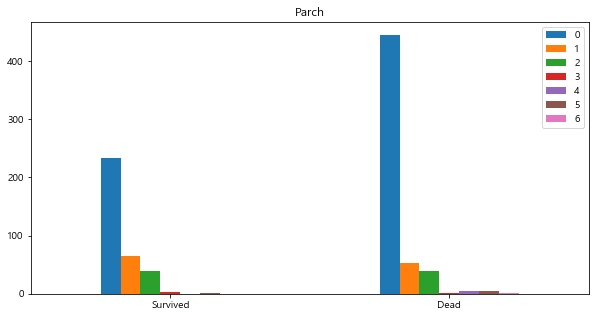

In [393]:
survived_1 = train[train['Survived']==1].loc[:,'Parch'].value_counts()
survived_0 = train[train['Survived']==0].loc[:,'Parch'].value_counts()
df=pd.DataFrame([survived_1,survived_0], index=['Survived','Dead'])
df.plot(kind='bar',figsize=(10,5))
plt.title('Parch')
plt.xticks(rotation=0)
plt.show()

In [394]:
def bar_chart(column):
    survived_1 = train[train['Survived']==1].loc[:,column].value_counts()
    survived_0 = train[train['Survived']==0].loc[:,column].value_counts()
    df=pd.DataFrame([survived_1,survived_0], index=['Survived','Dead'])
    df.plot(kind='bar',figsize=(10,5))
    plt.title(column)
    plt.xticks(rotation=0)
    return plt.show()

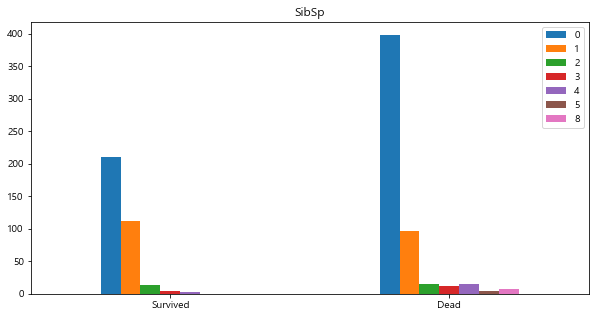

In [395]:
bar_chart('SibSp')

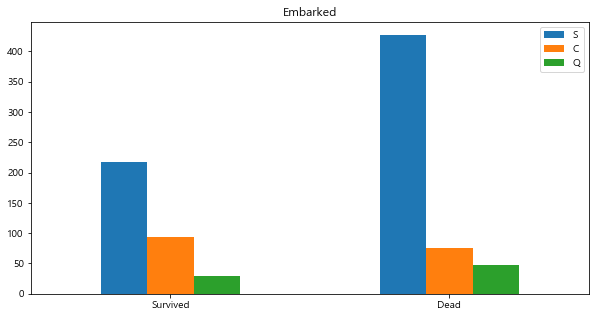

In [396]:
bar_chart('Embarked')

In [397]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [398]:
def sex_bar_chart(column):
    male_data = train[train['Sex']=='male'].loc[:,column].value_counts()
    female_data = train[train['Sex']=='female'].loc[:,column].value_counts()
    df = pd.DataFrame([male_data, female_data],index=['Male','Female'])
    df.plot(kind='bar',figsize=(10,5))
    plt.title(column)
    plt.xticks(rotation=0)
    return plt.show()

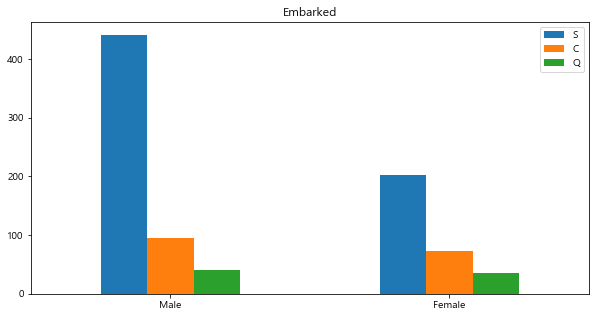

In [399]:
sex_bar_chart('Embarked')

In [400]:
def class_bar_chart(column):
    class1 = train[train['Pclass']==1].loc[:,column].value_counts()
    class2 = train[train['Pclass']==2].loc[:,column].value_counts()
    class3 = train[train['Pclass']==3].loc[:,column].value_counts()
    df = pd.DataFrame([class1,class2,class3],index=['1st','2nd','3rd'])
    df.plot(kind='bar',figsize=(10,5))
    plt.title(column)
    plt.xticks(rotation=0)
    return plt.show()

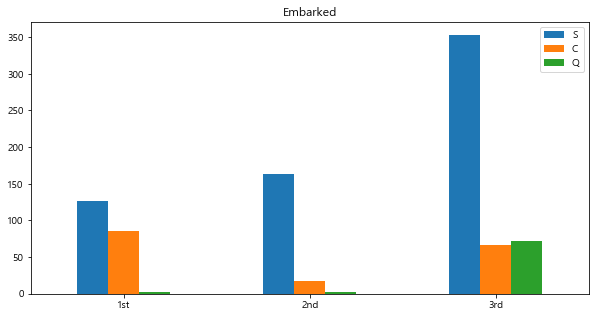

In [401]:
class_bar_chart('Embarked')

#### =============================================================

###  데이터 예측하기(?) ,   데이터 전처리 과정

In [402]:
train[train.loc[:,'Age'].isnull()]  #결측치 개수 파악

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [403]:
test[test.loc[:,'Age'].isnull()] #결측치 개수 파악

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
902,0,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
921,0,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
925,1,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
928,1,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S


In [404]:
tgroup = train.groupby('Sex')

In [405]:
type(tgroup)

pandas.core.groupby.generic.DataFrameGroupBy

In [406]:
for key, value in tgroup:
    print('* key : ',key)
    print('* number : ', len(value))
    print(value.head(2))
    print('\n')

* key :  female
* number :  314
             Survived  Pclass  \
PassengerId                     
2                   1       1   
3                   1       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  


* key :  male
* number :  577
             Survived  Pclass                      Name   Sex   Age  SibSp  \
PassengerId                                                                  
1                   0       3   Braund, Mr. Ow

In [407]:
train.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

In [408]:
train.groupby('Sex')['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [409]:
train['Age']=train['Age'].fillna(train.groupby('Sex')['Age'].transform('median'))
test['Age']=test['Age'].fillna(test.groupby('Sex')['Age'].transform('median'))

In [410]:
train[train.loc[:,'Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [411]:
test[test.loc[:,'Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [412]:
bins = [0,15,25,35,60,99]
labels = ['0','1','2','3','4']
cats = pd.cut(train.loc[:,'Age'],bins,labels=labels, include_lowest=True)
train['Age']=cats
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,7.9250,NaN,S


In [413]:
bins = [0,15,25,35,60,99]
labels = ['0','1','2','3','4']
cats = pd.cut(test.loc[:,'Age'],bins,labels=labels, include_lowest=True)
test['Age']=cats
test.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,2,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,3,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,4,0,0,240276,9.6875,NaN,Q


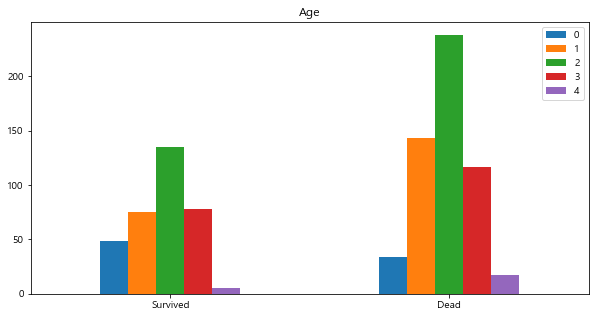

In [414]:
bar_chart('Age')  #위에 함수 설정해놓은 것 있음!

In [415]:
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,3,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,4,0,0,113572,80.0,B28,NaN


In [416]:
train[train['Pclass']==1].loc[:,'Embarked'].value_counts() 

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [417]:
train['Embarked']=train['Embarked'].fillna('S')

In [418]:
train[train['Pclass']==1].loc[:,'Embarked'].value_counts() 

S    129
C     85
Q      2
Name: Embarked, dtype: int64

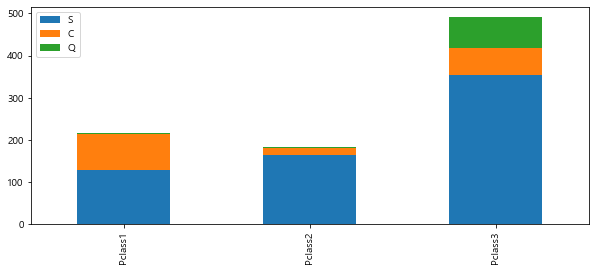

In [419]:
pclass1 = train[train["Pclass"] == 1].loc[:, "Embarked"].value_counts()
pclass2 = train[train["Pclass"] == 2].loc[:, "Embarked"].value_counts()
pclass3 = train[train["Pclass"] == 3].loc[:, "Embarked"].value_counts()
df = pd.DataFrame([pclass1, pclass2, pclass3], index = ["Pclass1", "Pclass2", "Pclass3"])
df.plot(kind = "bar", stacked = True, figsize = (10,4))

In [420]:
train.loc[train['Sex']=='female','Sex'] = 1
train.loc[train['Sex']=='male','Sex'] = 0

test.loc[test['Sex']=='female','Sex'] = 1
test.loc[test['Sex']=='male','Sex'] = 0

####  Fare에도 비어있는 값이 있음.(채워준다)

In [421]:
'''Fare'''
test['Fare'] = test['Fare'].fillna(test.groupby('Sex')['Fare'].transform('mean'))

In [422]:
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,7.9250,NaN,S


In [423]:
train.loc[train['Embarked']=='S','Embarked'] = 0
train.loc[train['Embarked']=='C','Embarked'] = 1
train.loc[train['Embarked']=='Q','Embarked'] = 2

test.loc[test['Embarked']=='S','Embarked'] = 0
test.loc[test['Embarked']=='C','Embarked'] = 1
test.loc[test['Embarked']=='Q','Embarked'] = 2

In [424]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C85,1
3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,7.9250,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0
5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0


In [425]:
train['FamilySize'] = train['SibSp']+train['Parch'] + 1 #새로운 컬럼을 만들어준다 (자기자신도 더해줌)
test['FamilySize'] = test['SibSp']+test['Parch'] + 1

In [426]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C85,1,2


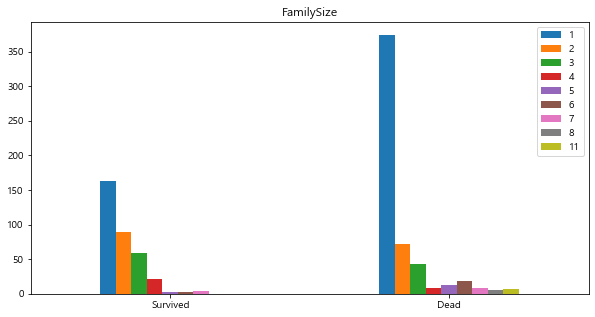

In [427]:
bar_chart('FamilySize')

### 분석을 하기 위해 사용할 컬럼(머신러닝 수행)

In [428]:
feature_names = ['Pclass','Sex','Age','Fare','Embarked','FamilySize']

In [429]:
feature_names

['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']

In [430]:
X_train = train[feature_names]
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
PassengerId,,,,,,
1,3,0,1,7.2500,0,2
2,1,1,3,71.2833,1,2
3,3,1,2,7.9250,0,1
4,1,1,2,53.1000,0,2
5,3,0,2,8.0500,0,1


In [431]:
Y_train = train['Survived']
Y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [432]:
X_test = test[feature_names]
Y_test = test['Survived']

In [433]:
Y_test.head()

PassengerId
892    0
893    1
894    0
895    0
896    1
Name: Survived, dtype: int64

In [434]:
X_test.head(3)

,Pclass,Sex,Age,Fare,Embarked,FamilySize
PassengerId,,,,,,
892,3,0,2,7.8292,2,1
893,3,1,3,7.0000,0,2
894,2,0,4,9.6875,2,1


In [435]:
X_test.info()
# 각 컬럼에 모두 418개의 데이터가 들어가있음(비어있는 값 없음)(전처리 완료)
#X_train 등 나머지도 마찬가지

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      418 non-null    int64   
 1   Sex         418 non-null    object  
 2   Age         418 non-null    category
 3   Fare        418 non-null    float64 
 4   Embarked    418 non-null    object  
 5   FamilySize  418 non-null    int64   
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 20.2+ KB


In [436]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      891 non-null    int64   
 1   Sex         891 non-null    object  
 2   Age         891 non-null    category
 3   Fare        891 non-null    float64 
 4   Embarked    891 non-null    object  
 5   FamilySize  891 non-null    int64   
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 42.8+ KB


=======================데이터 전처리 후 머신러닝 과정=======================

In [437]:
#  train엑셀로  --->    의사결정트리, 훈련을 수행
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [438]:
#test엑셀은 훈련 하면 안됨. ->>>왜냐하면 train을 바탕으로 훈련하고
#  test엑셀로 predict를 test해보아야 하기 때문.

#from sklearn.tree import DecisionTreeClassifier
#model = DecisionTreeClassifier(max_depth = 5)
#model.fit(X_test,Y_test)

In [439]:
#학습한 데이터를 바탕으로 predict라는 함수를 통해서 생존여부를 예측
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [440]:
submission = pd.read_csv('C:/Users/SMT047/Desktop/수업/data/14.Titanic/gender_submission.csv',index_col='PassengerId')
submission.head()
##원래 defalut 예상 값

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [443]:
#불러온 엑셀 submission에 우리가 예측한 데이터를 새로 입힌다.
submission['Survived']=predictions
submission.head()  #입힌 데이터중 위에서 5개만본다.
#893번 승객의 생존데이터가 바뀐 것을 볼 수 있음.

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [365]:
# 훈련한 데이터를 submission엑셀 파일에 덮어씌운다.
# submission.to_csv('C:/Users/SMT047/Desktop/수업/data/14.Titanic/gender_submission.csv')